**Meisam Asgari Jirhandeh**

#### Packages that already need to install for different approaches:
- Since I used Anaconda, the installation commands are based on it as  below
    1. Networkx: conda install -c anaconda networkx
    2. Pydot: conda install -c anaconda pydot
    3. Graphviz: conda install -c anaconda graphviz
    4. Plotly: conda install -c plotly plotly 
    5. Chart Studio: conda install -c plotly chart-studio
    6. Mpld3: conda install -c conda-forge mpld3

In [1]:
import networkx as nx
import pydot
import plotly.graph_objects as go
import plotly.io as pio
from mpl_toolkits.mplot3d import Axes3D
from networkx.readwrite import json_graph
import json

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
# Importing the Data 
edges = pd.read_excel("raan_case_study interns.xlsx", sheet_name="edges")
nodes = pd.read_excel("raan_case_study interns.xlsx", sheet_name="nodes")

In [3]:
# Main Graph
G = nx.from_pandas_edgelist(edges, 'source_id', 'target_id', edge_attr='weights', create_using=nx.DiGraph())

In [4]:
print(nx.info(G))
print('\nList of all nodes with corresponding IDs:\n', G.nodes(data=True))
print('\nList of all Edges with corresponding weight:\n', G.edges(data=True))

Name: 
Type: DiGraph
Number of nodes: 29
Number of edges: 32
Average in degree:   1.1034
Average out degree:   1.1034

List of all nodes with corresponding IDs:
 [(966, {}), (945, {}), (879, {}), (649, {}), (941, {}), (467, {}), (1042, {}), (785, {}), (619, {}), (457, {}), (639, {}), (747, {}), (185, {}), (349, {}), (1157, {}), (1152, {}), (517, {}), (158, {}), (552, {}), (498, {}), (574, {}), (1025, {}), (813, {}), (792, {}), (652, {}), (172, {}), (1009, {}), (3, {}), (709, {})]

List of all Edges with corresponding weight:
 [(966, 945, {'weights': 13}), (966, 879, {'weights': 10}), (966, 467, {'weights': 8}), (966, 1042, {'weights': 7}), (966, 785, {'weights': 7}), (966, 619, {'weights': 7}), (966, 639, {'weights': 6}), (966, 1152, {'weights': 6}), (966, 517, {'weights': 6}), (966, 158, {'weights': 6}), (966, 498, {'weights': 6}), (966, 1157, {'weights': 5}), (966, 185, {'weights': 5}), (966, 1025, {'weights': 5}), (966, 172, {'weights': 5}), (966, 3, {'weights': 5}), (879, 966, {'we

In [5]:
n_id = nodes.loc[:,'node_id'].values
n_label = nodes.loc[:,'node_label'].values
n_color = nodes.loc[:,'node_color'].values

#Nodes Mapping Structure
node_label_mapping = dict(zip(n_id,n_label))
node_color_mapping = dict(zip(n_id,n_color))
node_label_array = [node_label_mapping.get(node) for node in G.nodes()]
node_color_array = [node_color_mapping.get(node) for node in G.nodes()]

#Edges Mapping Structure
edge_weight = nx.get_edge_attributes(G,'weights')
edge_label_array = [edge_weight.get(edge) for edge in G.edges()]

# 2D Visualization of Data

### First Approach: Interactive Network by exploiting Networkx and D3

In [6]:
# A copy of main graph
T = nx.from_pandas_edgelist(edges, 'source_id', 'target_id', edge_attr='weights', create_using=nx.DiGraph())
# Assigning each node to all its own corresponding attributes
for idx in T.nodes():
    T.nodes[idx]['node_id'] = idx
    T.nodes[idx]['node_label'] = node_label_mapping.get(idx)
    T.nodes[idx]['node_color'] = node_color_mapping.get(idx)
# Relabeling nodes' id with consecutive integers     
H = nx.relabel.convert_node_labels_to_integers(T)

In [7]:
# Converting our graph into a json format fil
data = json_graph.node_link_data(H)
with open('Graph.json', 'w') as f:
    json.dump(data, f, indent=4)

- Using HTML and Javascript which enable us to embed our D3.js visualisation in the notebook

In [8]:
%%html
<div id="d3-container"></div>
<style>
.node {stroke: #111; stroke-width: 0.01px;}
.link {stroke: #999; stroke-opacity: 1;}
</style>

In [9]:
%%javascript
// We load the latest version of d3.js from the Web.
require.config({paths: {d3: "https://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {

    // Parameter declaration, the height and width of our viz.
    var width = 500,
        height = 500;

    // Color scale for node colors.
    var color = d3.scale.category10();

    // We create a force-directed dynamic graph layout.
    // D3 has number of layouts - refer to the documentation.
    var force = d3.layout.force()
        .charge(-350)
        .linkDistance(90)
        .size([width, height]);

    // We select the < div> we created earlier and add an 
    // SVG = Scalable Vector Graphics
    var svg = d3.select("#d3-container").select("svg")
    if (svg.empty()) {
        svg = d3.select("#d3-container").append("svg")
                    .attr("width", width)
                    .attr("height", height);
    }
    
    // When we wish to use arrows to indicate direction
    svg.append("defs").selectAll("marker")
    .data(["suit", "licensing", "resolved"])
    .enter().append("marker")
    .attr("id", function(d) { return d; })
    .attr("viewBox", "0 -5 10 10")
    .attr("refX", 25)
    .attr("refY", 0)
    .attr("markerWidth", 6)
    .attr("markerHeight", 6)
    .attr("orient", "auto")
    .append("path")
    .attr("d", "M0,-5L10,0L0,5 L10,0 L0, -5")
    .style("stroke", "#4679BD")
    .style("opacity", "0.6");

    // We load the JSON network file.
    d3.json("Graph.json", function(error, graph) {
        // Within this block, the network has been loaded
        // and stored in the 'graph' object.

        // We load the nodes and links into the force-directed
        // graph and initialise the dynamics.
        force.nodes(graph.nodes)
            .links(graph.links)
            .start();

        // We create a < line> SVG element for each link
        // in the graph.
        var link = svg.selectAll(".link")
            .data(graph.links)
            .enter().append("line")
            .attr("class", "link")
            .attr("width", 10)
            .style("marker-end",  "url(#suit)"); //To use arrows

        // We create a < circle> SVG element for each node
        // in the graph, and we specify a few attributes.
        
        var node = svg.selectAll(".node")
            .data(graph.nodes)
            .enter().append("g")
            .attr("class", "node")
            .call(force.drag);
        
        node.append("circle")
            .attr("r", 8)
            .style("fill", function (d) {
            return color(d.node_color);})
        
        //Adding node label
        node.append("text")
            .attr("dx", 10)
            .attr("dy", ".35em")
            .text(function(d) { return d.node_label })
            .style("stroke", "black");


        // We bind the positions of the SVG elements
        // to the positions of the dynamic force-directed graph,
        // at each time step.
        force.on("tick", function() {
            link.attr("x1", function(d) { return d.source.x; })
                .attr("y1", function(d) { return d.source.y; })
                .attr("x2", function(d) { return d.target.x; })
                .attr("y2", function(d) { return d.target.y; });
            
            d3.selectAll("circle").attr("cx", function (d) { return d.x; })
            .attr("cy", function (d) { return d.y; });
            
            d3.selectAll("text").attr("x", function (d) { return d.x; })
            .attr("y", function (d) { return d.y; });
        });
    });
});

<IPython.core.display.Javascript object>

### Second Approach: 2D Networks in 5 different layouts using only Networkx toolkits

#### 1) Pydot and Graphviz Layout 

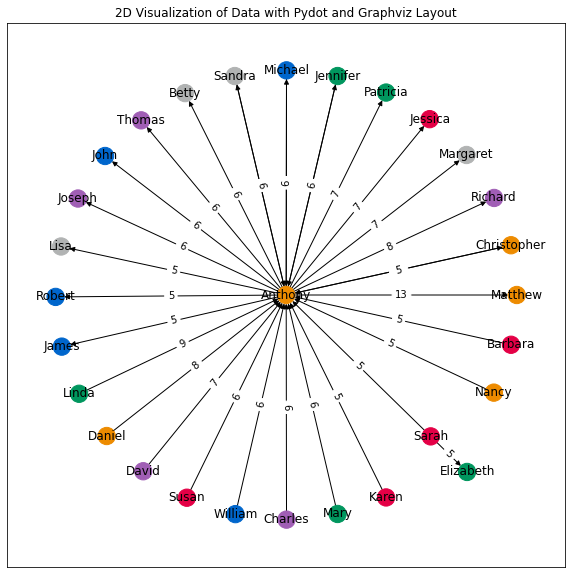

In [10]:
plt.figure(figsize=(10,10))
plt.title('2D Visualization of Data with Pydot and Graphviz Layout')
# Nodes positions which are determined with Pydot and Graphviz Layout
pos1 = nx.nx_pydot.graphviz_layout(G,  prog='circo') 
# Plotting the Graph
nx.draw_networkx(G, pos1, with_labels=True, labels=node_label_mapping, node_color=node_color_array)
# Plotting the edges weight
nx.draw_networkx_edge_labels(G, pos1, edge_labels=edge_weight)
plt.savefig("Pydot and Graphviz Layout.png")
plt.show()

#### 2) Planar Layout

C:\Users\milas\anaconda3\lib\site-packages\networkx\drawing\layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


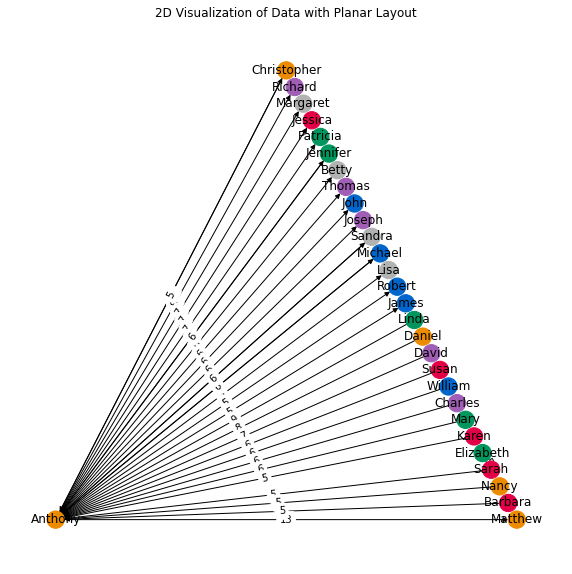

In [11]:
plt.figure(figsize=(10,10))
plt.title('2D Visualization of Data with Planar Layout')
# Nodes positions which are determined with Planar Layout
pos2 = nx.planar_layout(G)
# Plotting the Graph
nx.draw_planar(G, with_labels=True, labels=node_label_mapping, node_color=node_color_array)
# Plotting the edges weight
nx.draw_networkx_edge_labels(G, pos2, edge_labels=edge_weight)
plt.savefig("Planar Layout.png")
plt.show()

#### 3) Spiral Layout

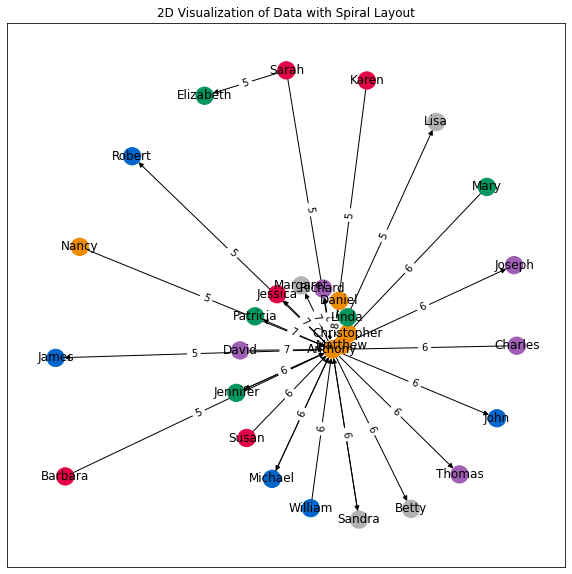

In [12]:
plt.figure(figsize=(10,10))
plt.title('2D Visualization of Data with Spiral Layout')
# Nodes positions which are determined with Spiral Layout
pos3 = nx.spiral_layout(G)
# Plotting the Graph
nx.draw_networkx(G, pos3, with_labels=True, labels=node_label_mapping, node_color=node_color_array)
# Plotting the edges weight
nx.draw_networkx_edge_labels(G, pos3, edge_labels=edge_weight)
plt.savefig("Spiral Layout.png")
plt.show()

#### 4) Circular Layout

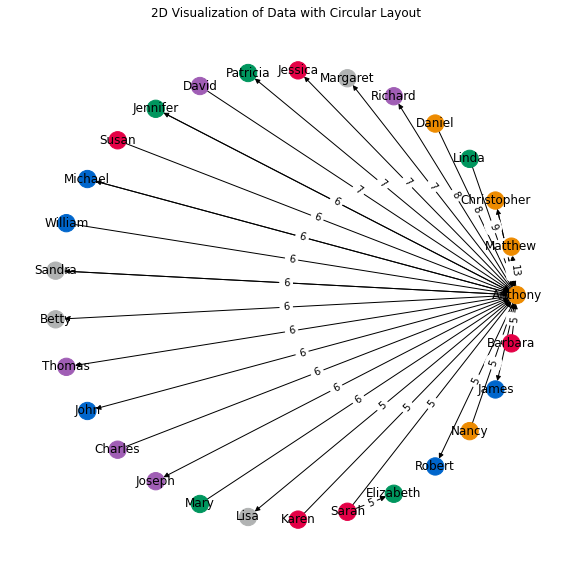

In [13]:
plt.figure(figsize=(10,10))
plt.title('2D Visualization of Data with Circular Layout')
# Nodes positions which are determined with Circular Layout
pos4 = nx.circular_layout(G)
# Plotting the Graph
nx.draw_circular(G,with_labels=True, labels=node_label_mapping, node_color=node_color_array)
# Plotting the edges weight
nx.draw_networkx_edge_labels(G, pos4, edge_labels=edge_weight)
plt.savefig("Circular Layout.png")
plt.show()

#### 5) Spring Layout

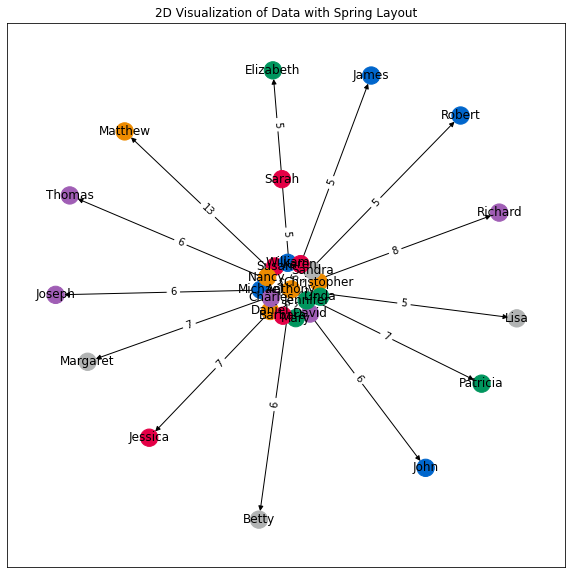

In [14]:
plt.figure(figsize=(10,10))
plt.title('2D Visualization of Data with Spring Layout')
# Nodes positions which are determined with Spring Layout
pos5 = nx.spring_layout(G)
# Plotting the Graph
nx.draw_networkx(G, pos5, with_labels=True, labels=node_label_mapping, node_color=node_color_array)
# Plotting the edges weight
nx.draw_networkx_edge_labels(G, pos5, edge_labels=edge_weight)
plt.savefig("Spring Layout.png")
plt.show()